In [1]:
import numpy as np
from sklearn.datasets import make_multilabel_classification
import matplotlib.pyplot as plt

In [2]:
X, y_true = make_multilabel_classification(n_samples=1000, n_features=2, n_classes=1)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

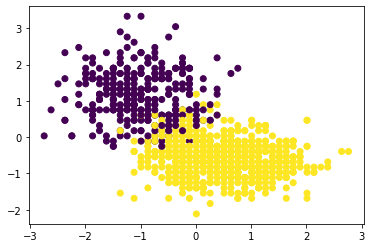

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true)
plt.show()

In [5]:
def update_centroid(centroid, X):
    dist = []
    for c in centroid:
        dist.append(np.sum(np.square(X - c), axis=1))
    dist=np.array(dist)
    pred=np.argmin(dist.T, axis=1)
    
    new_centroid = []
    for i in np.unique(pred):
        new_centroid.append(X[pred == i].mean(axis=0)) 
    new_centroid = np.array(new_centroid)
    return new_centroid


In [6]:
class KMeans():
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
    
    def fit_transform(self, X):
        centroid_ = np.random.randn(self.n_clusters, X.shape[1])
        centroid = update_centroid(centroid_, X)

        while np.sum(centroid != centroid_) !=0:
            centroid_ = centroid
            centroid = update_centroid(centroid_, X)
        dist = []
        for c in centroid:
            dist.append(np.sum(np.square(X - c), axis=1))
        dist=np.array(dist)
        pred=np.argmin(dist.T, axis=1) 
        
        return pred

In [7]:
km = KMeans(n_clusters=2)
pred= km.fit_transform(X_scaled)

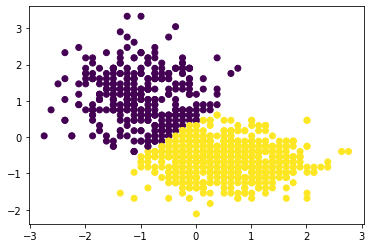

In [8]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred)
plt.show()